#### PRNG evolution analysis with prediction attacks

The cell below contains experimental configuration settings in the form of a python dictionary.

In [1]:
from Core.Experiment import Experiment

Using TensorFlow backend.



Generating 100 sets of 1000 using Linear_Congruential ...
3921802306
3769210430
4049930080
35682439
3961402091
4025465978
3834726133
2382199679
2446263566
2293671690
2752899134
1912192000
676321309
523729433
1021104846
1085168733
1365888383
1646608033
1927327683
2424703096
2705422746
2769486633
3050206283
3114270170
3178334057
3459053707
923248438
987312325
1268031975
898784336
746192460
810256347
657664471
938384121
1219103771
1716479184
1563887308
1627951195
1692015082
1756078969
2036798619
1884206743
1731614867
62432650
2471561961
2535625848
2599689735
2230442096
1644538694
1925258344
2205977994
2270041881
2334105768
2614825418
2678889305
2742953192
2807017079
3521048255
3585112142
4082487555
4146551442
3560648040
1891465823
5627843
4109855289
3052492392
3116556279
2963964403
3461339816
4175370992
3372811827
3755743333
4036462983
22215342
1998033127
3710845422
297636866
3344501415
1893426777
1908562460
1858182440
2355557853
2852933266
2916997153
3478436453
1082991009
3708776083
333

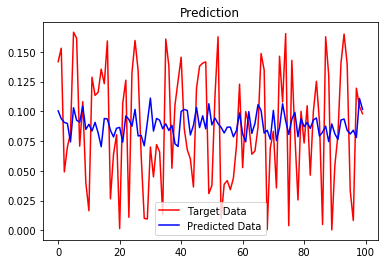

[0.1416801  0.1529621  0.04902443 0.07005528 0.08133728 0.16638555
 0.1612945  0.07066358 0.10806748 0.04000057 0.01645336 0.12866508
 0.11333358 0.11590828 0.13540598 0.12319913 0.15906988 0.02643561
 0.06383951 0.08027092 0.0014136  0.10661314 0.12611085 0.01089117
 0.1323018  0.15946525 0.1343849  0.06270173 0.00996632 0.00947472
 0.06993423 0.04485387 0.07201733 0.06588473 0.01314932 0.16068184
 0.13817619 0.05214472 0.10543008 0.12541938 0.14540869 0.08549913
 0.06759292 0.05992717 0.03637996 0.11940348 0.13785963 0.14043433
 0.14147588 0.03085566 0.03753821 0.11234602 0.16256508 0.0099415
 0.03863811 0.04176276 0.034097   0.04384585 0.07100931 0.12276152
 0.0526115  0.09976426 0.08903221 0.06395185 0.06652655 0.08651586
 0.14850852 0.13471016 0.00054274 0.06921795 0.083133   0.03554699
 0.14622556 0.10783845 0.16523166 0.00390078 0.142726   0.07975014
 0.02548158 0.09995977 0.07334626 0.10461757 0.04624116 0.09952651
 0.12515682 0.09087756 0.00484609 0.16261907 0.13036457 0.00030

In [2]:
configuration = {
    'SEED_METHOD' : 'ticks',  #using SEED_METHODS.py as source
    'PRNG_METHOD' : 'Linear_Congruential', #using PRNG_METHODS.py as source
    'NUM_SETS' : 100,    #generate NUM_SETS sets of length SET_LEN
    'SET_LEN': 1000,
    'IS_NEW_MODEL' : True,
    'PATH' : 'foo', #if IS_NEW_MODEL, new files will be created / overidden at this location. If !IS_NEW_MODEL, previous model with weights will be loaded. File must be named
    'BATCH_SIZE': 15,
    'NUM_EPOCHS': 20
}
E = Experiment(configuration)
E.perform()


In [31]:
from datetime import *

def ticks():
    return  str( int( (datetime.utcnow() - datetime(1, 1, 1)).total_seconds() * 10000000 ))[-6:]

print(int(ticks()))

862656
